In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

!unzip "/content/drive/MyDrive/rsprint/train.csv.zip"  -d "/content/drive/MyDrive/rsprint/"

unzip:  cannot find or open /content/drive/MyDrive/rsprint/train.csv.zip, /content/drive/MyDrive/rsprint/train.csv.zip.zip or /content/drive/MyDrive/rsprint/train.csv.zip.ZIP.


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/rsprint/train.csv')

In [ ]:
data.shape

(20800, 5)

In [ ]:
data.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

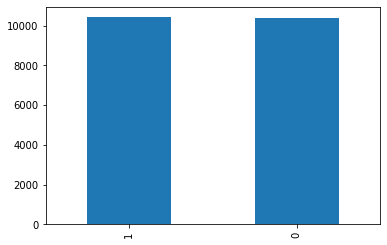

In [ ]:


plotdata = data.label.value_counts()
plotdata.plot(kind="bar")


In [ ]:
X=data.drop('label',axis=1)

In [ ]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y=data['label']

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
y.tail()

20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, dtype: int64

In [ ]:
data.shape

(20800, 5)

In [ ]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages=data.copy()

In [ ]:

messages.reset_index(inplace=True)

In [ ]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    WNlemma = nltk.WordNetLemmatizer()
    
    review = [WNlemma.lemmatize(word, pos='v') for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

'civilians kill single us airstrike identify'

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 5000)

In [ ]:

y=messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'accept',
 'access',
 'access pipeline',
 'access pipeline protest',
 'accidentally',
 'accord',
 'account']

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [ ]:

count_df.tail(10)

,abandon,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,absurd,abuse,abuse new,abuse new york,accept,access,access pipeline,access pipeline protest,accidentally,accord,account,accusation,accusations,accuse,accuse trump,acknowledge,acknowledge emf,acknowledge emf damage,aclu,acquit,acquittal,acres,across,act,act like,act new,act new york,action,active,activism,activist,...,year,year breitbart,year eve,year new,year new york,year old,year old girl,years,years ago,years breitbart,years later,years new,years new york,years since,yemen,yes,yet,yet another,yiannopoulos,yield,yo,york,york city,york new,york new york,york state,york time,young,youth,youtube,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
12240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
from sklearn.naive_bayes import MultinomialNB
count_model_nb=MultinomialNB()
count_model_nb.fit(X_train,y_train)
count_nb_pred=count_model_nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
print("Confusion Matrix is : \n\n" , confusion_matrix(y_test,count_nb_pred))
print("\n")
print("Classification Report for Naive Bayes :  \n\n" ,classification_report(y_test,count_nb_pred))
print("\n Accuracy Score for Naive Bayes :  ",accuracy_score(y_test,count_nb_pred))

Confusion Matrix is : 

 [[3040  349]
 [ 268 2378]]


Classification Report for Naive Bayes :  

               precision    recall  f1-score   support

           0       0.92      0.90      0.91      3389
           1       0.87      0.90      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035


 Accuracy Score for Naive Bayes :   0.8977630488815245


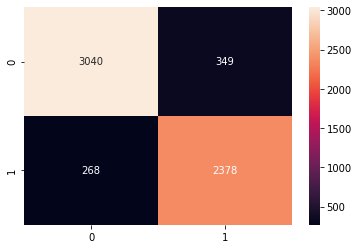

In [ ]:
cm=confusion_matrix(y_test,count_nb_pred)
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [ ]:
tf_svc_cls = svm.SVC(kernel='linear')
tf_svc_cls.fit(X_train, y_train)
tf_svc_prediction = tf_svc_cls.predict(X_test)

In [ ]:
print("Confusion Matrix is : \n\n" , confusion_matrix(y_test,tf_svc_prediction))
print("\n")
print("Classification Report for SVC :  \n\n" ,classification_report(y_test,tf_svc_prediction))
print("\n Accuracy Score for SVC :  ",accuracy_score(y_test,tf_svc_prediction))

Confusion Matrix is : 

 [[3120  269]
 [ 167 2479]]


Classification Report for SVC :  

               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3389
           1       0.90      0.94      0.92      2646

    accuracy                           0.93      6035
   macro avg       0.93      0.93      0.93      6035
weighted avg       0.93      0.93      0.93      6035


 Accuracy Score for SVC :   0.927754763877382


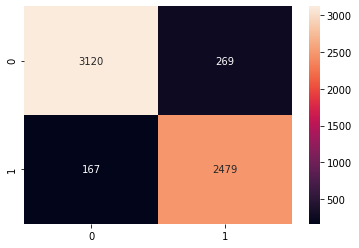

In [ ]:
cm=confusion_matrix(y_test,tf_svc_prediction)
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 50000, ngram_range = ( 1, 1 ))
X = tfidf.fit_transform(corpus).toarray()

#x = tfidf.transform(new_data['clean_review'])

In [ ]:
X.shape

(18285, 8678)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
tf_svc_cls = svm.SVC(kernel='linear')
tf_svc_cls.fit(X_train, y_train)
tf_svc_prediction = tf_svc_cls.predict(X_test)

In [ ]:
print("Confusion Matrix is : \n\n" , confusion_matrix(y_test,tf_svc_prediction))
print("\n")
print("Classification Report for SVC :  \n\n" ,classification_report(y_test,tf_svc_prediction))
print("\n Accuracy Score for SVC :  ",accuracy_score(y_test,tf_svc_prediction))

Confusion Matrix is : 

 [[3120  269]
 [ 167 2479]]


Classification Report for SVC :  

               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3389
           1       0.90      0.94      0.92      2646

    accuracy                           0.93      6035
   macro avg       0.93      0.93      0.93      6035
weighted avg       0.93      0.93      0.93      6035


 Accuracy Score for SVC :   0.927754763877382
